<a href="https://colab.research.google.com/github/ZOORoman/MMO/blob/master/RK__1_Bushuev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Рубежный контроль №1

**Вариант №1.**
Для заданного набора данных проведите корреляционный анализ. В случае наличия пропусков в данных удалите строки или колонки, содержащие пропуски. Сделайте выводы о возможности построения моделей машинного обучения и о возможном вкладе признаков в модель.

##Загружаем набор данных

In [28]:
from google.colab import files
files.upload()

{}

**Подключение библиотек**

In [0]:
from datetime import datetime 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [0]:
#Настроим отображение графиков [3,4]:
%matplotlib inline

In [0]:
#Задаем стиль
sns.set(style="ticks")

In [0]:
#Установка форматов участков для сохранения PNG с высоким разрешением
from IPython.display import set_matplotlib_formats 
set_matplotlib_formats("retina")

In [0]:
#Зададим ширину текстового представления данных, чтобы в дальнейшем текст в отчёте влезал на А4:
pd.set_option("display.width", 70)

##Основные характеристики датасета

**Загрузим непосредственно данные:**

In [0]:
data = pd.read_csv("googleplaystore.csv")
dt = pd.read_csv("googleplaystore_user_reviews.csv")

**Выведем данные**

In [53]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [54]:
dt.dtypes

App                        object
Translated_Review          object
Sentiment                  object
Sentiment_Polarity        float64
Sentiment_Subjectivity    float64
dtype: object

**Описание данных:**

* App - Application name
* Category - Category the app belongs to
* Rating - Overall user rating of the app (as when scraped)
* Reviews - Number of user reviews for the app (as when scraped)
* Size - Size of the app (as when scraped)
* Installs - Number of user downloads/installs for the app (as when scraped)
* Type - Paid or Free
* Price - Price of the app (as when scraped)
* Content Rating - Age group the app is targeted at - Children / Mature 21+ / Adult
* Genres - An app can belong to multiple genres (apart from its main category). For eg, a musical family game will belong to Music, Game, Family genres.
* Last Updated - Date when the app was last updated on Play Store (as when scraped)
* Current Ver - Current version of the app available on Play Store (as when scraped)
* Android Ver - Min required Android version (as when scraped)

**Посмотрим на набор данных:**

In [19]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


##Работа с данными

In [20]:
df = data.copy()

df['Reviews'] = df.Reviews.str.replace('M', '').astype(float)


df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [21]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

**Cоединение таблиц**

In [0]:
def connection_pandas(dt,df):
        result = pd.merge(dt, df, on = 'App')
        return result

dataset = connection_pandas(dt, df)

**Размер датасета**

In [24]:
dataset.shape

(122662, 17)

In [25]:
dataset.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,HEALTH_AND_FITNESS,4.0,2490.0,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
1,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,HEALTH_AND_FITNESS,4.0,2490.0,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
2,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,HEALTH_AND_FITNESS,4.0,2490.0,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
3,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,HEALTH_AND_FITNESS,4.0,2490.0,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
4,10 Best Foods for You,NaN,NaN,NaN,NaN,HEALTH_AND_FITNESS,4.0,2490.0,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up


##Корреляционный анализ

In [26]:
dataset.corr()

,Sentiment_Polarity,Sentiment_Subjectivity,Rating,Reviews
Sentiment_Polarity,1.000000,0.227551,0.052010,-0.107372
Sentiment_Subjectivity,0.227551,1.000000,0.057025,-0.017990
Rating,0.052010,0.057025,1.000000,0.151476
Reviews,-0.107372,-0.017990,0.151476,1.000000


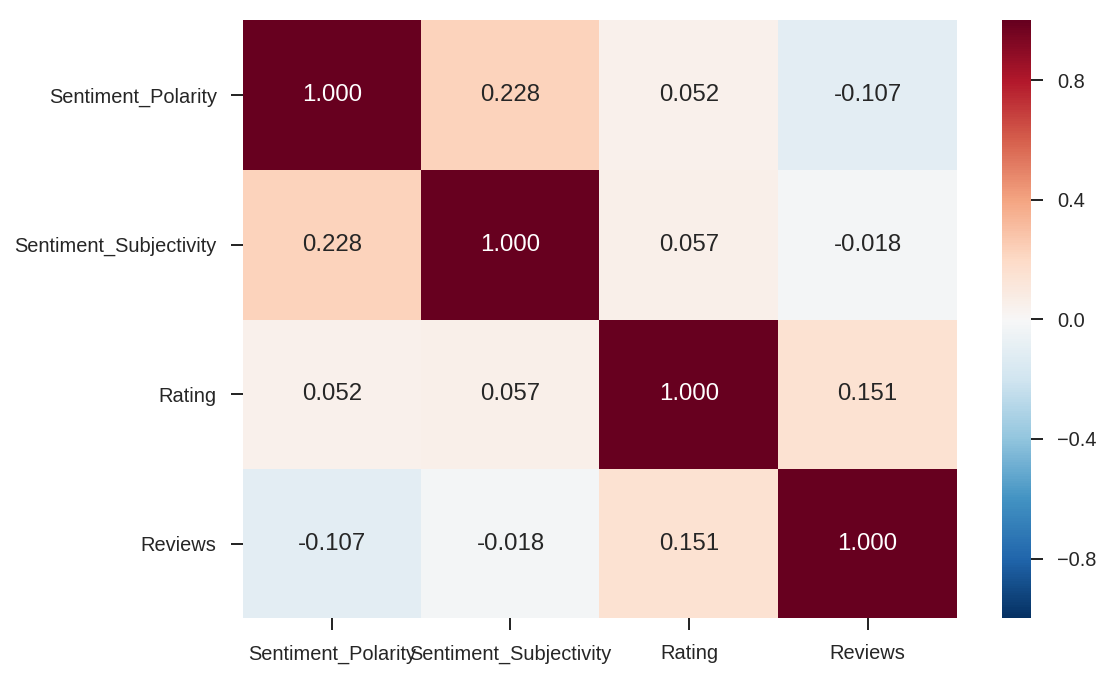

In [27]:
sns.heatmap(dataset.corr(), annot=True, fmt=".3f")